C:\Users\vivek\Anaconda3\lib\site-packages\matplotlib\collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0,0.5,'Percentage change in preschooler obesity')

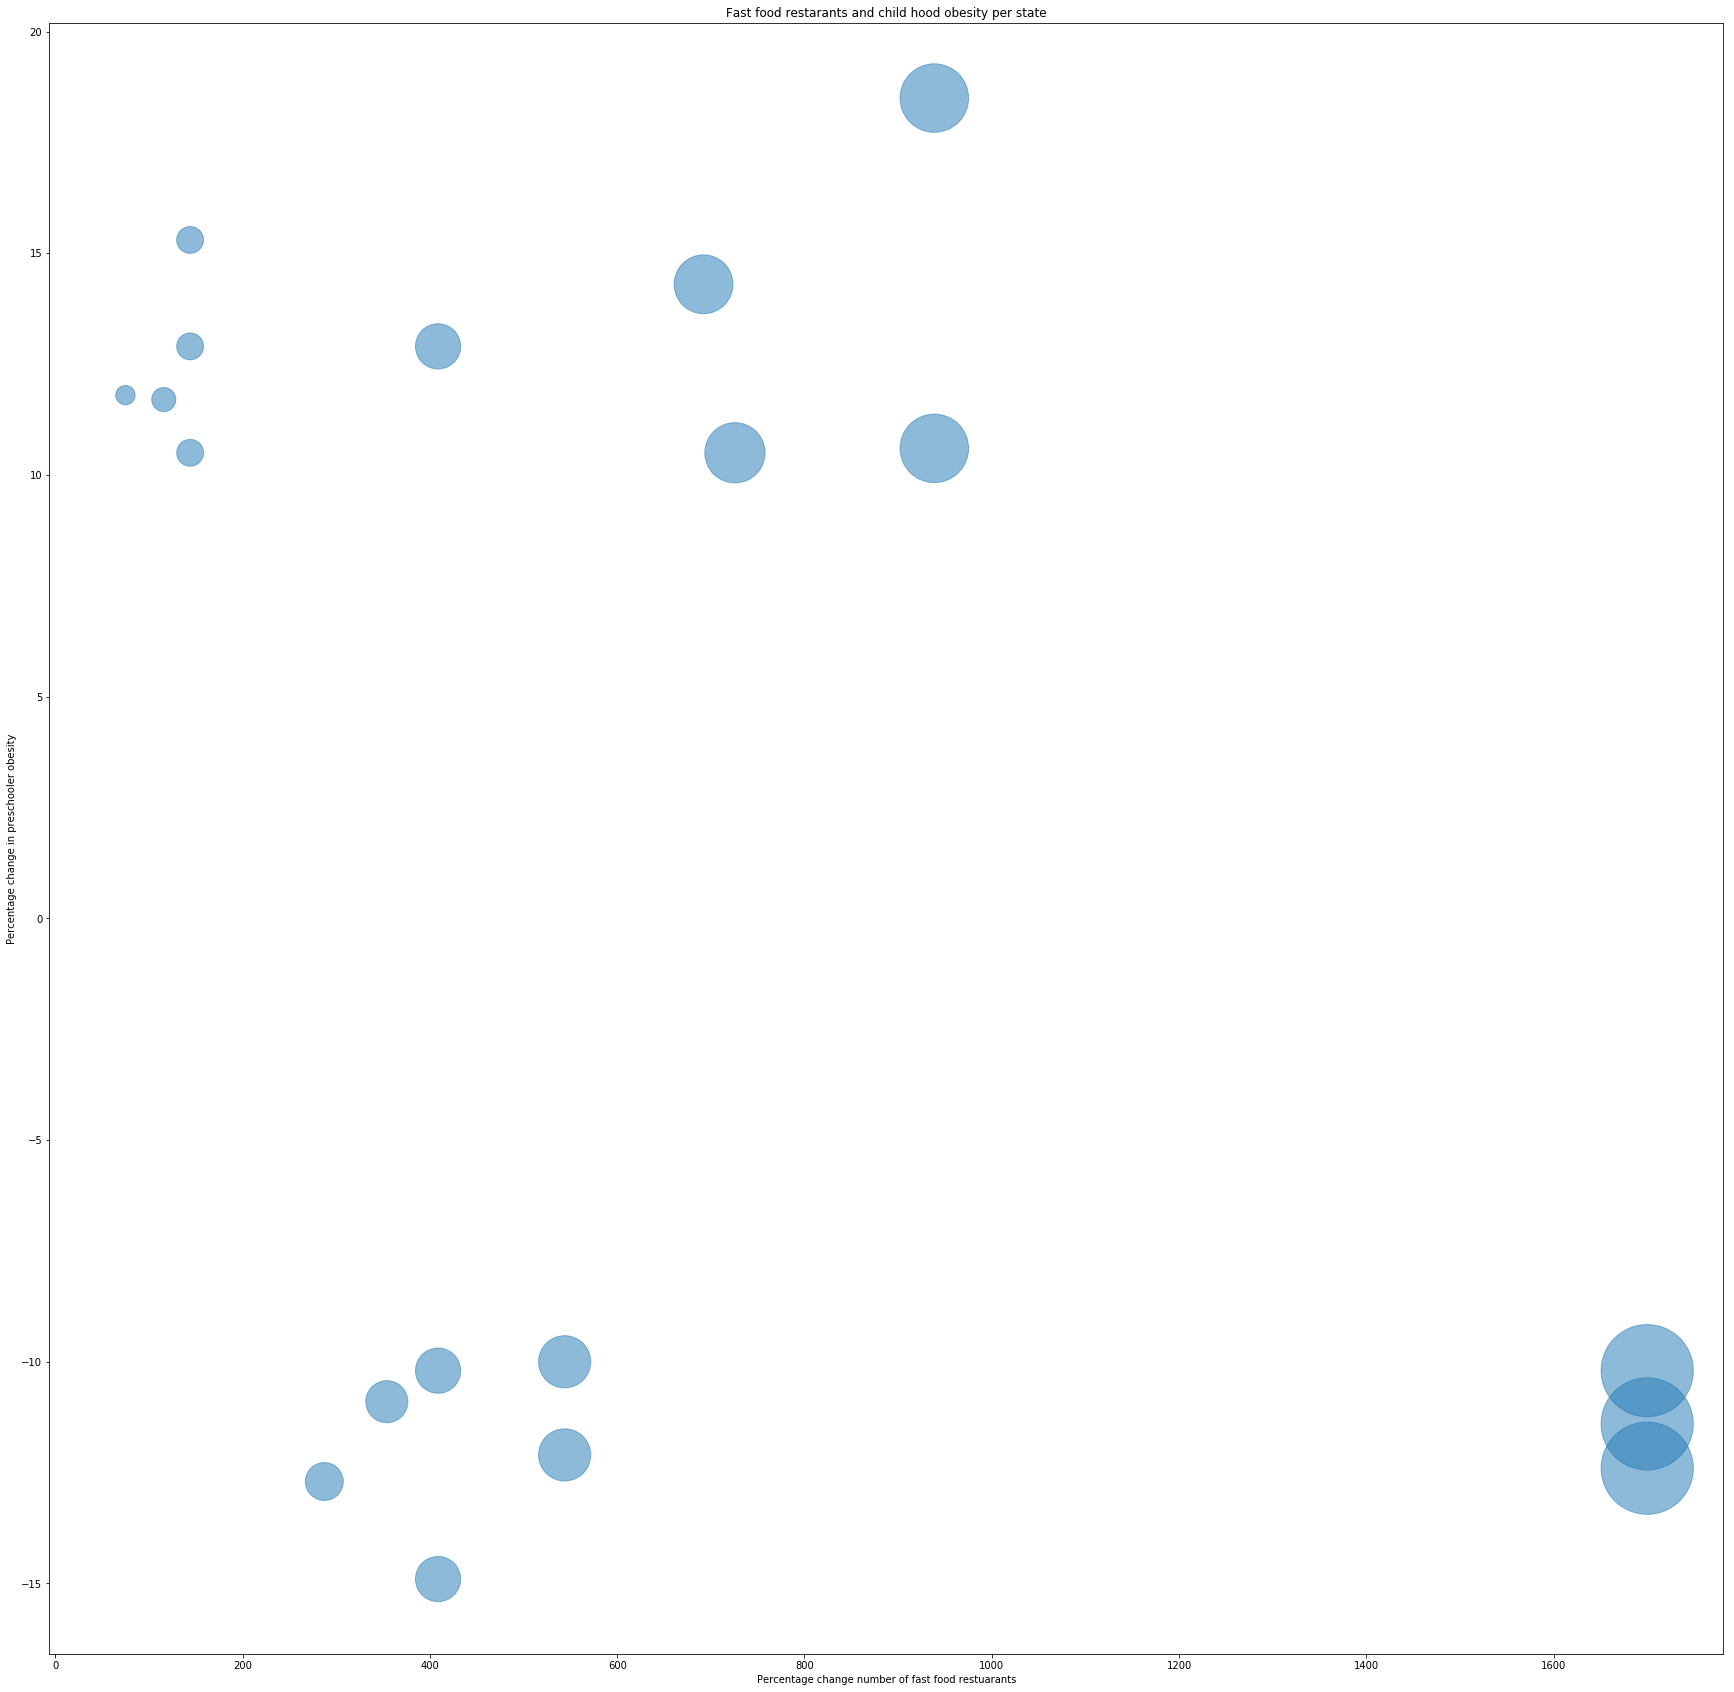

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

health_sheet = 'HEALTH'
health_data = pd.read_excel("DataDownload.xls", sheet_name=health_sheet)

rest_sheet = 'RESTAURANTS'
rest_data = pd.read_excel("DataDownload.xls", sheet_name=rest_sheet)

fig = plt.figure(figsize=(30,30))
ps_obesity_data_highest = health_data[['State','PCH_OBESE_CHILD_08_11']].sort_values(['PCH_OBESE_CHILD_08_11'], ascending=False).head(10)
ps_obesity_data_lowest = health_data[['State','PCH_OBESE_CHILD_08_11']].sort_values(['PCH_OBESE_CHILD_08_11']).head(10)
ps_obesity_data = ps_obesity_data_highest.combine_first(ps_obesity_data_lowest)

rest_ff_data =rest_data[['State','PCH_FFR_07_12']].groupby('State',as_index=False).agg({"PCH_FFR_07_12":"sum"})
merge_obesity_ff = pd.merge(rest_ff_data,ps_obesity_data, on='State',how='inner')

plt.scatter(x=merge_obesity_ff['PCH_FFR_07_12'],y=merge_obesity_ff['PCH_OBESE_CHILD_08_11'],s= merge_obesity_ff['PCH_FFR_07_12']*5, alpha=0.5)
plt.title("Fast food restarants and child hood obesity per state")
plt.xlabel("Percentage change number of fast food restuarants")
plt.ylabel("Percentage change in preschooler obesity")